<a href="https://colab.research.google.com/github/cdsrijon/AI-ML-Projects/blob/main/Diabetes_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Diabetes Detection System**

**Project Overview**

- Build a binary classification model that predicts whether a person has diabetes or not based on medical features.

**Dataset**

- Use the Given Diabetes Dataset

**Features include:**

* Pregnancies

* Glucose

* BloodPressure

* SkinThickness

* Insulin

* BMI

* DiabetesPedigreeFunction

* Age

* Outcome (0 = No, 1 = Yes)

**Submission Requirements**

- Use at least 3 classifiers from:

* Logistic Regression

* K-Nearest Neighbors (KNN)

* Decision Tree

* Random Forest (optional bonus)

- Evaluate using:

* Confusion Matrix

* Precision, Recall, F1-score

* ROC Curve & AUC

- Split data into train/test

- Apply feature scaling where needed

- Use plots to visualize performance

# Import Libraries

In [ ]:
import pandas as pd                                   # Import pandas for data manipulation and analysis
from sklearn.model_selection import train_test_split  # Import for splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler      # Import for feature scaling
from sklearn.linear_model import LogisticRegression   # Import for Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier    # Import for K-Nearest Neighbors model
from sklearn.tree import DecisionTreeClassifier       # Import for Decision Tree model
from sklearn.ensemble import RandomForestClassifier   # Import for Random Forest model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc # Import for model evaluation metrics
import matplotlib.pyplot as plt                       # Import for plotting visualizations
import seaborn as sns                                 # Import for enhanced data visualizations

# Load Dataset


In [ ]:
df = pd.read_csv('/content/diabetes_dataset.csv')
df.head()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Task
Perform exploratory data analysis on the dataframe `df`.

## Check for missing values

### Subtask:
Identify if there are any missing values in the dataset.


**Reasoning**:
Check for missing values in each column of the DataFrame.



In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Examine data types

### Subtask:
Check the data types of each column to ensure they are appropriate.


**Reasoning**:
Use the `.info()` method to display column data types and non-null counts.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Visualize data distribution

### Subtask:
Create visualizations (e.g., histograms, box plots) to explore the distribution of features and the target variable.


**Reasoning**:
Create visualizations to explore the distribution of features and the target variable as requested in the instructions.



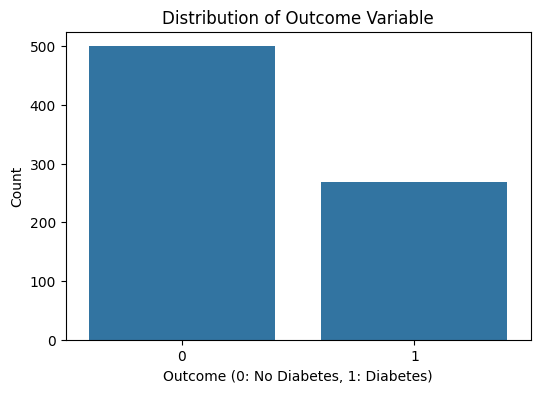

In [ ]:
# # Create histograms for numerical features
# df.hist(figsize=(12, 10))
# plt.tight_layout()
# plt.show()

# # Create box plots for numerical features
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df.drop(columns=['Outcome']))
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# Create a count plot for the 'Outcome' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

## Explore relationships

### Subtask:
Analyze the relationships between features and the target variable.


**Reasoning**:
Calculate the correlation matrix and visualize it using a heatmap to understand the relationships between features and the target variable.



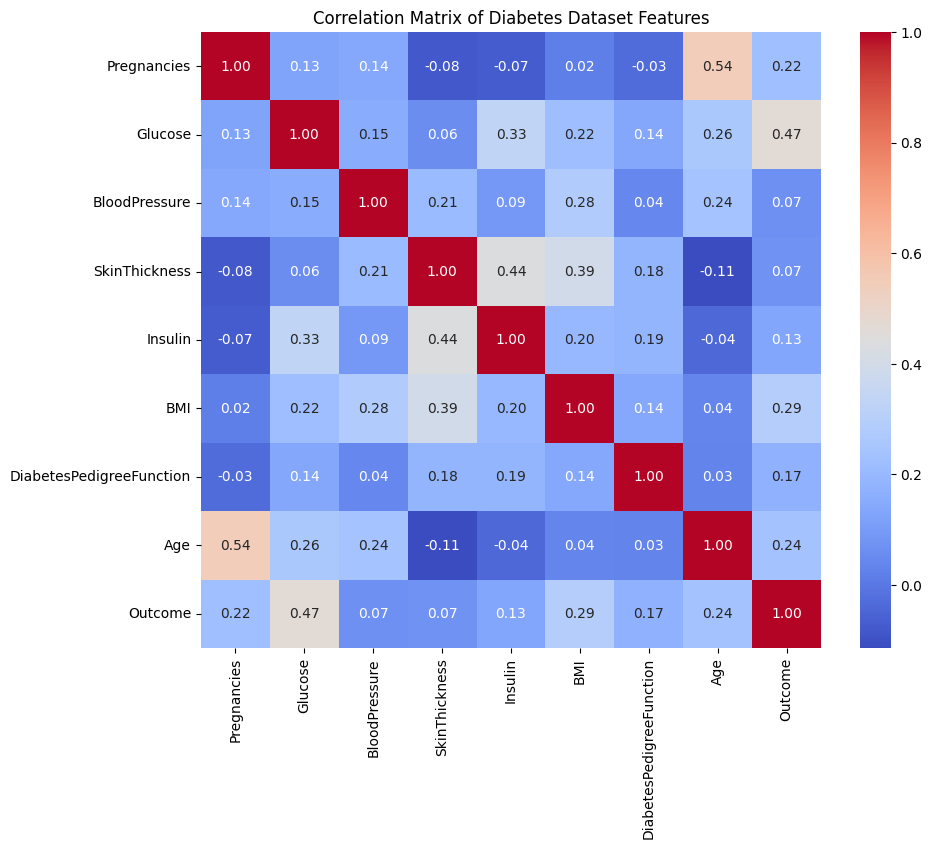

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.show()

## Summary:

### Data Analysis Key Findings

*   All columns in the dataset have 0 missing values.
*   The data types of the columns are primarily `int64` and `float64`.
*   Descriptive statistics including count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum were calculated for each numerical column.
*   Visualizations (histograms, box plots, and a count plot) were successfully generated to show the distribution of features and the target variable.
*   A correlation matrix and heatmap were created to visualize the relationships between features and the target variable. The heatmap shows the pairwise correlations between all features and 'Outcome', with annotations displaying the exact correlation values.

### Insights or Next Steps

*   Based on the distribution plots, consider addressing any skewed distributions or potential outliers in the features in subsequent data preprocessing steps.
*   Utilize the insights from the correlation analysis to inform feature selection or engineering for model building, focusing on features with stronger relationships with the 'Outcome' variable.


In [ ]:
# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Initialize and train K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Initialize and train Decision Tree model
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_scaled, y_train)

# Initialize and train Random Forest model
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

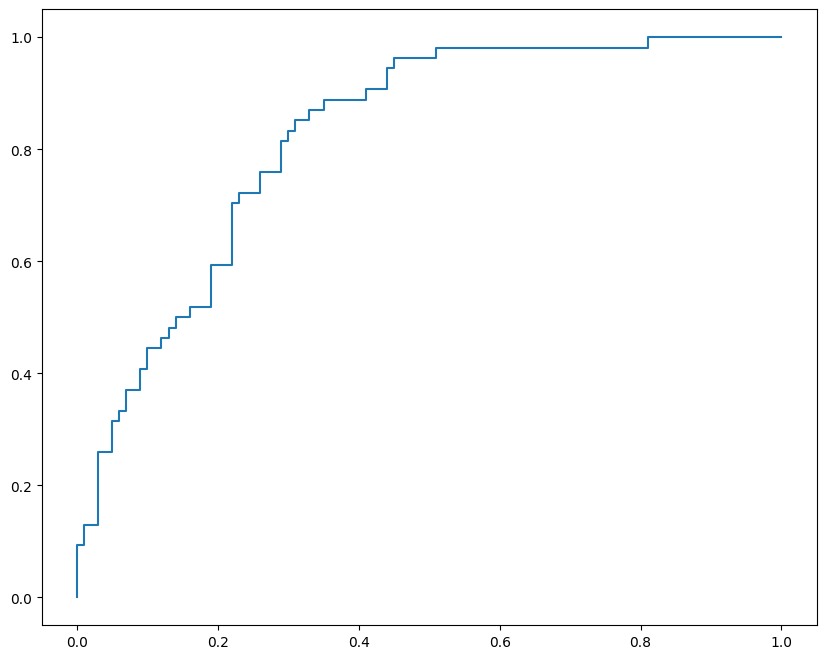

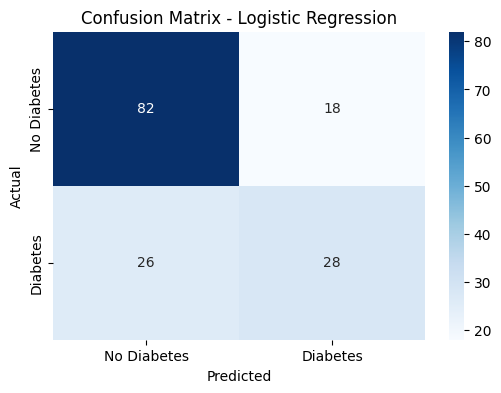

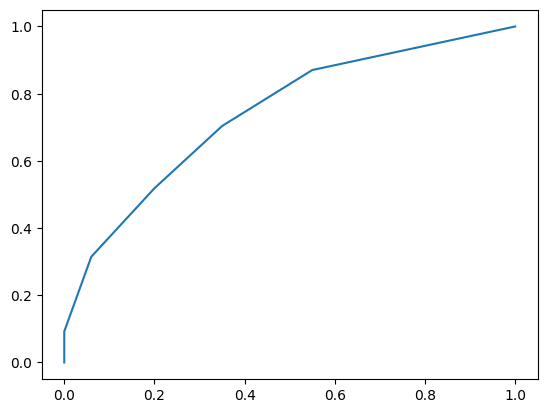

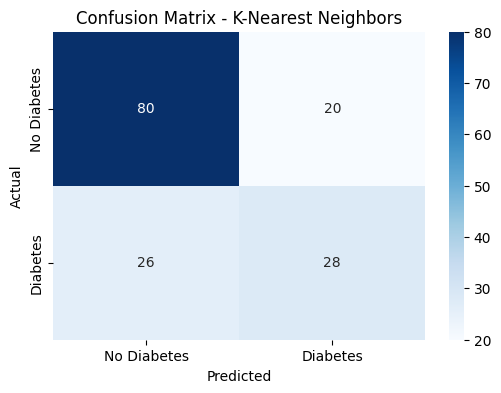

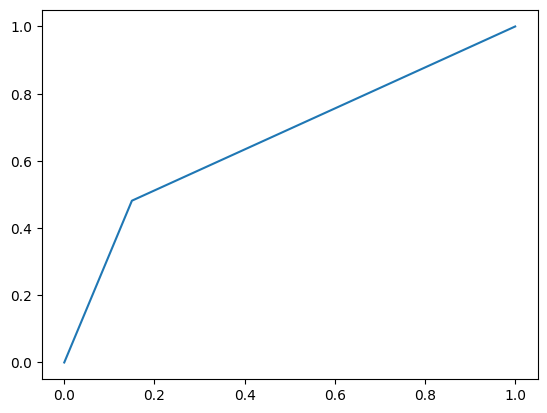

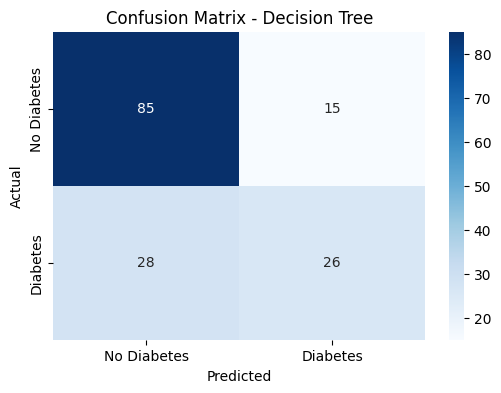

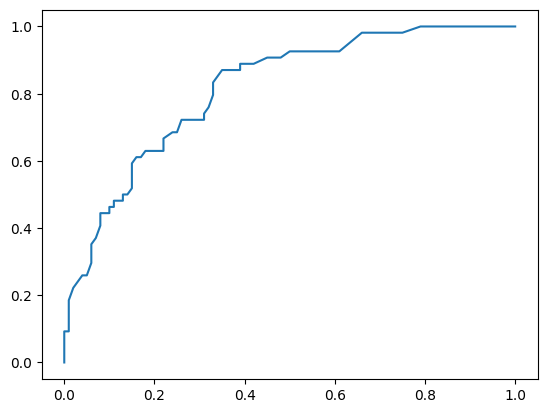

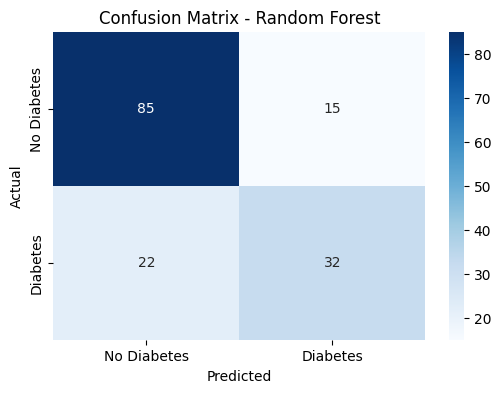

/tmp/ipython-input-3371067756.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


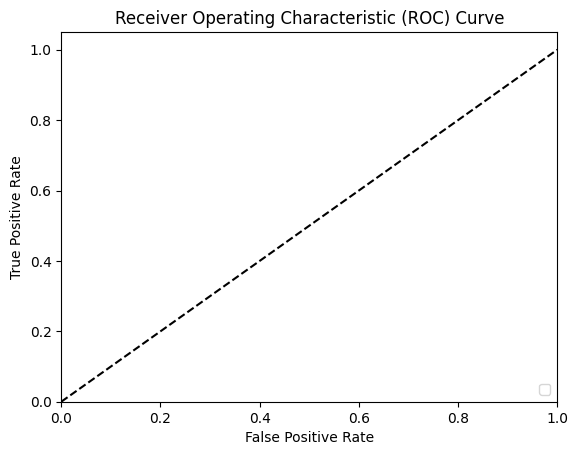

--- Logistic Regression ---
Confusion Matrix: {'TN': np.int64(82), 'FP': np.int64(18), 'FN': np.int64(26), 'TP': np.int64(28)}
Precision: 0.61
Recall: 0.52
F1-score: 0.56
ROC AUC: 0.82
-------------------------
--- K-Nearest Neighbors ---
Confusion Matrix: {'TN': np.int64(80), 'FP': np.int64(20), 'FN': np.int64(26), 'TP': np.int64(28)}
Precision: 0.58
Recall: 0.52
F1-score: 0.55
ROC AUC: 0.74
-------------------------
--- Decision Tree ---
Confusion Matrix: {'TN': np.int64(85), 'FP': np.int64(15), 'FN': np.int64(28), 'TP': np.int64(26)}
Precision: 0.63
Recall: 0.48
F1-score: 0.55
ROC AUC: 0.67
-------------------
--- Random Forest ---
Confusion Matrix: {'TN': np.int64(85), 'FP': np.int64(15), 'FN': np.int64(22), 'TP': np.int64(32)}
Precision: 0.68
Recall: 0.59
F1-score: 0.63
ROC AUC: 0.81
-------------------


In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Logistic Regression": log_reg,
    "K-Nearest Neighbors": knn,
    "Decision Tree": dec_tree,
    "Random Forest": rand_forest
}

results = {}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    results[name] = {
        "Confusion Matrix": {"TN": tn, "FP": fp, "FN": fn, "TP": tp},
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC AUC": roc_auc
    }

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


for name, metrics in results.items():
    print(f"--- {name} ---")
    print(f"Confusion Matrix: {metrics['Confusion Matrix']}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1-score: {metrics['F1-score']:.2f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.2f}")
    print("-" * (len(name) + 6))